**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia de datos/Semana6"
os.chdir(DIR)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [82]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [83]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [84]:
cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], inplace=True)
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [85]:
num_rows=cars_df.shape[0]
num_cols=cars_df.shape[1]
num_rows, num_cols

(426880, 18)

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [86]:
#revisar faltantes
faltantes=cars_df.isna().sum()/num_rows
faltantes

,0
region,0.000000
region_url,0.000000
price,0.000000
year,0.002823
manufacturer,0.041337
model,0.012362
condition,0.407852
cylinders,0.416225
fuel,0.007058
odometer,0.010307


In [87]:
cars_df.dropna(thresh=num_rows*0.7, axis=1, inplace=True)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


Restan 12 columnas despues de realizar el borrado

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [88]:
#Obtenemos las columas con un porcentaje de NaN menor a 5%
faltantes_porcentaje = cars_df.isnull().mean() * 100
columnas_menos_5_porciento = faltantes_porcentaje[faltantes_porcentaje < 5].index.tolist()
columnas_menos_5_porciento

['region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'state']

In [89]:
cars_df.dropna(subset=columnas_menos_5_porciento, inplace=True)

registros_eliminados = (num_rows - cars_df.shape[0]) / num_rows * 100
print(f"Porcentaje de registros eliminados: {registros_eliminados:.2f}%")

Porcentaje de registros eliminados: 8.73%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [90]:
faltantes_porcentaje = cars_df.isnull().mean() * 100
columnas_con_faltantes = faltantes_porcentaje[faltantes_porcentaje > 0].index.tolist()
print("Las columnas que tienen valores faltantes son: ",columnas_con_faltantes)
print("La variable type tiene ",cars_df['type'].isna().sum()," valores faltantes")
print("La moda de la variable type es ",cars_df['type'].mode().values[0])

Las columnas que tienen valores faltantes son:  ['type']
La variable type tiene  82628  valores faltantes
La moda de la variable type es  sedan


Aquí vemos que la comumna con valores faltantes es 'type', al ser esta una variable categórica la mejor medida de tendencia central para imputar los datos es la moda, en este caso la moda es sedan

In [91]:
cars_df['type'].fillna(cars_df['type'].mode()[0], inplace=True)
print("La variable type tiene ",cars_df['type'].isna().sum()," valores faltantes")

La variable type tiene  0  valores faltantes


<ipython-input-91-8ceafdd129ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['type'].fillna(cars_df['type'].mode()[0], inplace=True)


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

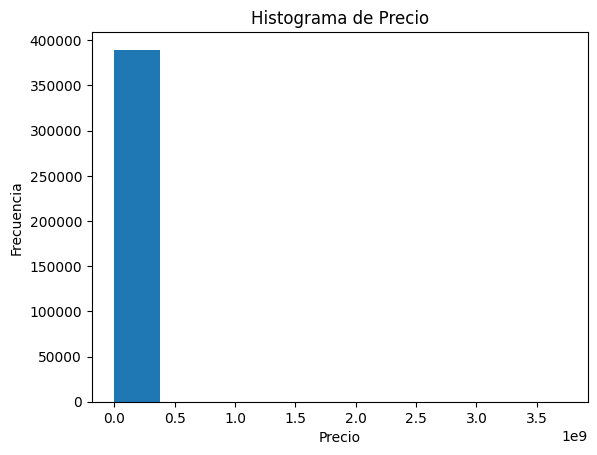

In [92]:
plt.hist(cars_df['price'], bins=10)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio')
plt.show()

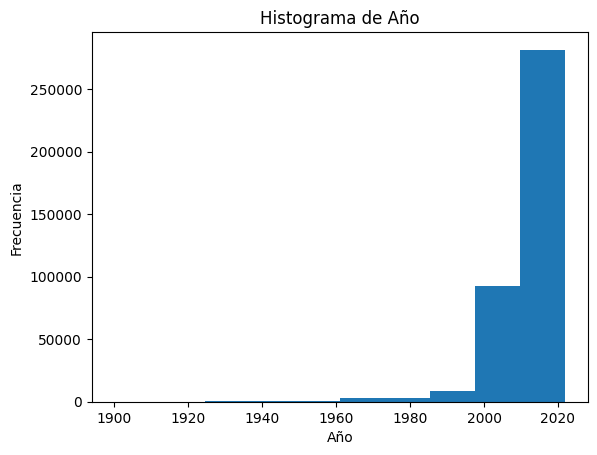

In [93]:
plt.hist(cars_df['year'], bins=10)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma de Año')
plt.show()

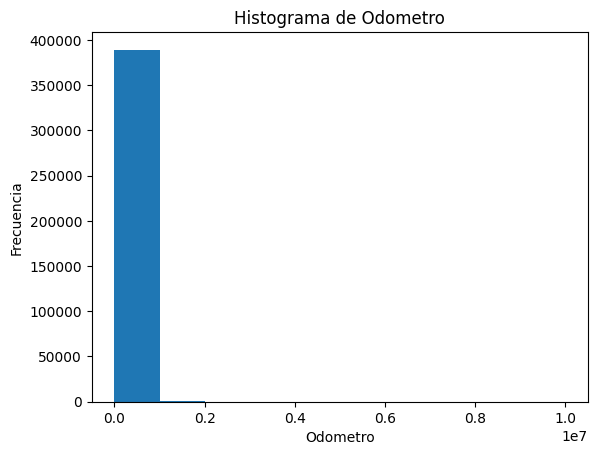

In [94]:
plt.hist(cars_df['odometer'], bins=10)
plt.xlabel('Odometro')
plt.ylabel('Frecuencia')
plt.title('Histograma de Odometro')
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [95]:
from datetime import datetime

anio_actual = datetime.now().year

cars_df['age'] = anio_actual - cars_df['year']
cars_df.drop(columns=['year'], inplace=True)

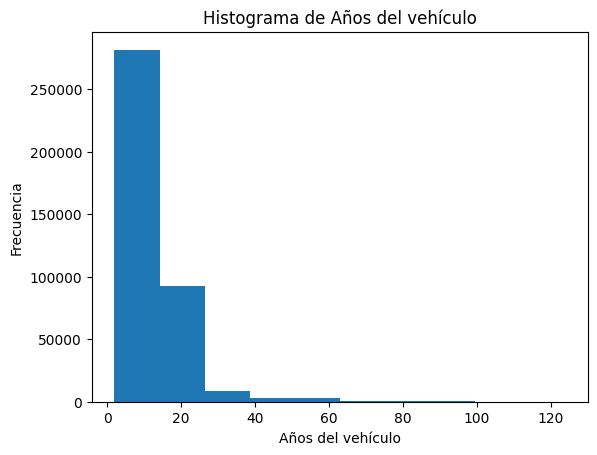

In [96]:
plt.hist(cars_df['age'], bins=10)
plt.xlabel('Años del vehículo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Años del vehículo')
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

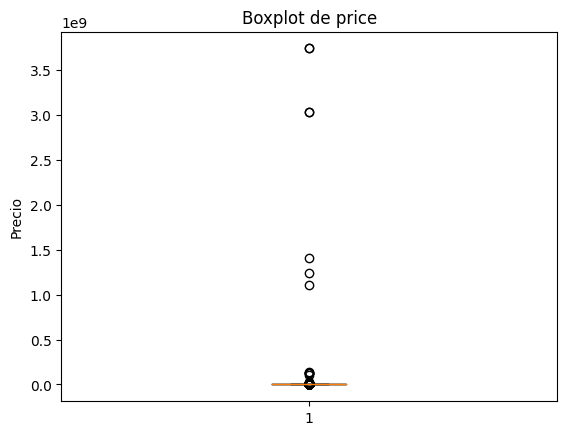

Número de valores atípicos: 6656


In [97]:
# Gráfico de boxplot para identificar valores atípicos
plt.boxplot(cars_df['price'])
plt.ylabel('Precio')
plt.title('Boxplot de price')
plt.show()

# Identificar valores atípicos utilizando el rango intercuartílico (IQR)
Q1 = cars_df['price'].quantile(0.25)
Q3 = cars_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cars_df[(cars_df['price'] < lower_bound) | (cars_df['price'] > upper_bound)]

# Número de valores atípicos
num_outliers = len(outliers)
print("Número de valores atípicos:", num_outliers)

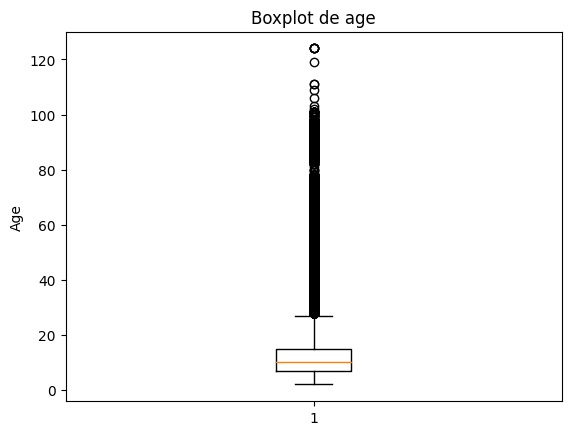

Número de valores atípicos: 14209


In [98]:
# Gráfico de boxplot para identificar valores atípicos
plt.boxplot(cars_df['age'])
plt.ylabel('Age')
plt.title('Boxplot de age')
plt.show()

# Identificar valores atípicos utilizando el rango intercuartílico (IQR)
Q1 = cars_df['age'].quantile(0.25)
Q3 = cars_df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cars_df[(cars_df['age'] < lower_bound) | (cars_df['age'] > upper_bound)]

# Número de valores atípicos
num_outliers = len(outliers)
print("Número de valores atípicos:", num_outliers)

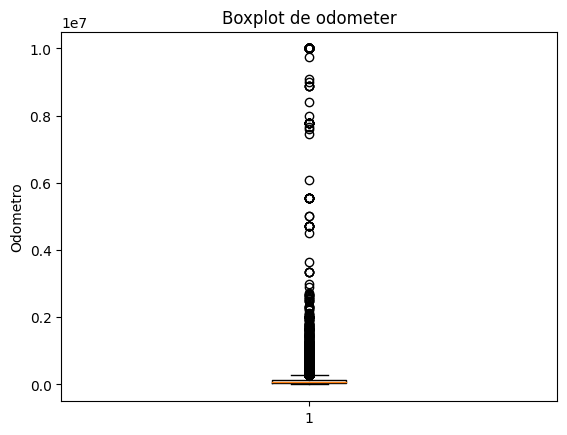

Número de valores atípicos: 3226


In [99]:
# Gráfico de boxplot para identificar valores atípicos
plt.boxplot(cars_df['odometer'])
plt.ylabel('Odometro')
plt.title('Boxplot de odometer')
plt.show()

# Identificar valores atípicos utilizando el rango intercuartílico (IQR)
Q1 = cars_df['odometer'].quantile(0.25)
Q3 = cars_df['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cars_df[(cars_df['odometer'] < lower_bound) | (cars_df['odometer'] > upper_bound)]

# Número de valores atípicos
num_outliers = len(outliers)
print("Número de valores atípicos:", num_outliers)

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [100]:
def calcular_porcentaje_outliers(df, columna):
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
  porcentaje_outliers = (len(outliers) / len(df)) * 100
  return porcentaje_outliers

porcentaje_outliers_price = calcular_porcentaje_outliers(cars_df, 'price')
porcentaje_outliers_age = calcular_porcentaje_outliers(cars_df, 'age')
porcentaje_outliers_odometer = calcular_porcentaje_outliers(cars_df, 'odometer')


print(f"Porcentaje de valores atípicos en 'price': {porcentaje_outliers_price:.2f}%")
print(f"Porcentaje de valores atípicos en 'age': {porcentaje_outliers_age:.2f}%")
print(f"Porcentaje de valores atípicos en 'odometer': {porcentaje_outliers_odometer:.2f}%")

Porcentaje de valores atípicos en 'price': 1.71%
Porcentaje de valores atípicos en 'age': 3.65%
Porcentaje de valores atípicos en 'odometer': 0.83%


In [101]:
Q1 = cars_df['price'].quantile(0.25)
Q3 = cars_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_price = cars_df[(cars_df['price'] < lower_bound) | (cars_df['price'] > upper_bound)]
outliers_price


Q1 = cars_df['age'].quantile(0.25)
Q3 = cars_df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_age = cars_df[(cars_df['age'] < lower_bound) | (cars_df['age'] > upper_bound)]
outliers_age


Q1 = cars_df['odometer'].quantile(0.25)
Q3 = cars_df['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_odometer = cars_df[(cars_df['odometer'] < lower_bound) | (cars_df['odometer'] > upper_bound)]
outliers_odometer

price_outliers_bool = cars_df.index.isin(outliers_price.index)
age_outliers_bool = cars_df.index.isin(outliers_age.index)
odometer_outliers_bool = cars_df.index.isin(outliers_odometer.index)


cars_df = cars_df[~price_outliers_bool & ~age_outliers_bool & ~odometer_outliers_bool]

# Porcentaje de registros eliminados
print(f"Porcentaje de registros eliminados: {(num_rows - cars_df.shape[0])/num_rows*100}%")

Porcentaje de registros eliminados: 14.184782608695654%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

la desviación de price es  0.6785242024775427
la desviación de Age es  0.7478990509778874
la desviación de Odometer es  0.46483628821640854


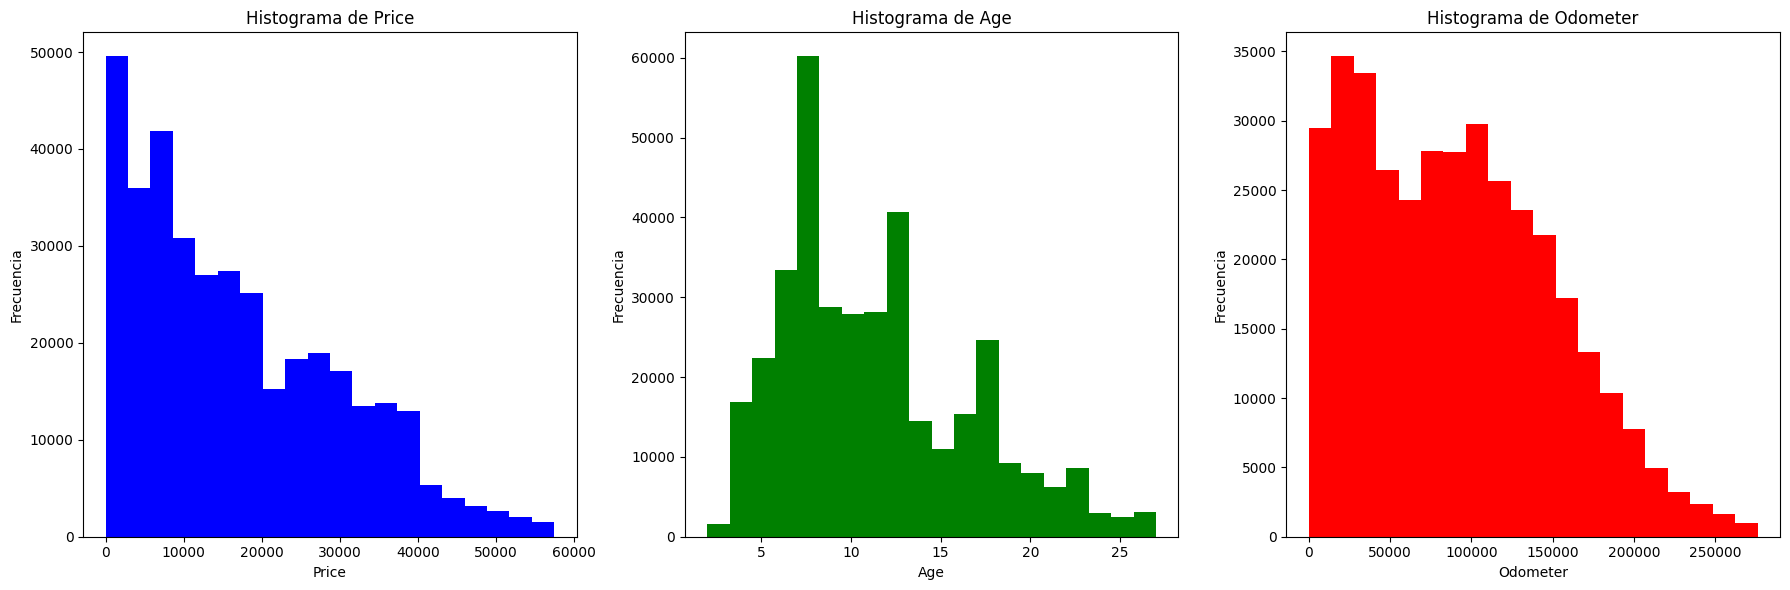

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para 'price'
axs[0].hist(cars_df['price'], bins=20, color='blue')
axs[0].set_title('Histograma de Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frecuencia')
print("la desviación de price es ",cars_df['price'].skew())

# Histograma para 'age'
axs[1].hist(cars_df['age'], bins=20, color='green')
axs[1].set_title('Histograma de Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frecuencia')
print("la desviación de Age es ",cars_df['age'].skew())

# Histograma para 'odometer'
axs[2].hist(cars_df['odometer'], bins=20, color='red')
axs[2].set_title('Histograma de Odometer')
axs[2].set_xlabel('Odometer')
axs[2].set_ylabel('Frecuencia')
print("la desviación de Odometer es ",cars_df['odometer'].skew())

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


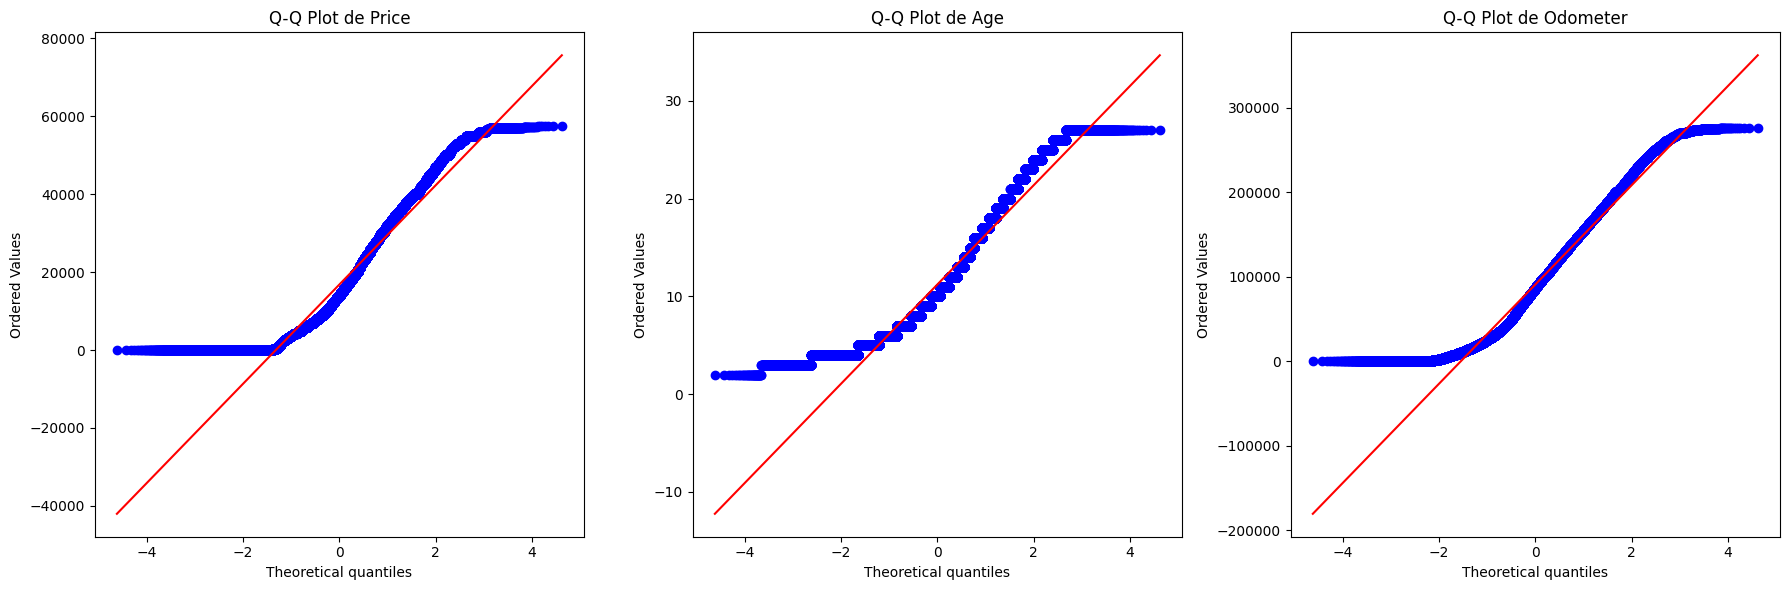

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico Q-Q para 'price'
stats.probplot(cars_df['price'], dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot de Price')

# Gráfico Q-Q para 'age'
stats.probplot(cars_df['age'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot de Age')

# Gráfico Q-Q para 'odometer'
stats.probplot(cars_df['odometer'], dist="norm", plot=axs[2])
axs[2].set_title('Q-Q Plot de Odometer')

plt.tight_layout()
plt.show()


Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [106]:

from sklearn.preprocessing import PowerTransformer

# Crear un objeto PowerTransformer con la transformación Yeo-Johnson
yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)

# Variables a transformar
variables_a_transformar = ['price', 'odometer']

# Aplicar la transformación Yeo-Johnson a las variables seleccionadas
transf_df = pd.DataFrame(yeo_johnson.fit_transform(cars_df[variables_a_transformar]),
                         columns=['price_yeo', 'odometer_yeo'])

# Mostrar el dataframe con las variables transformadas
print(transf_df)


         price_yeo  odometer_yeo
0       194.933364    623.675987
1       164.326657    695.994731
2       209.204110    346.526341
3       188.293578    519.996769
4       137.708592    949.705360
...            ...           ...
366323  167.423035    456.840699
366324  187.243996    270.474616
366325  198.386565    153.705344
366326  182.964760    440.666821
366327  187.243996    379.362155

[366328 rows x 2 columns]


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

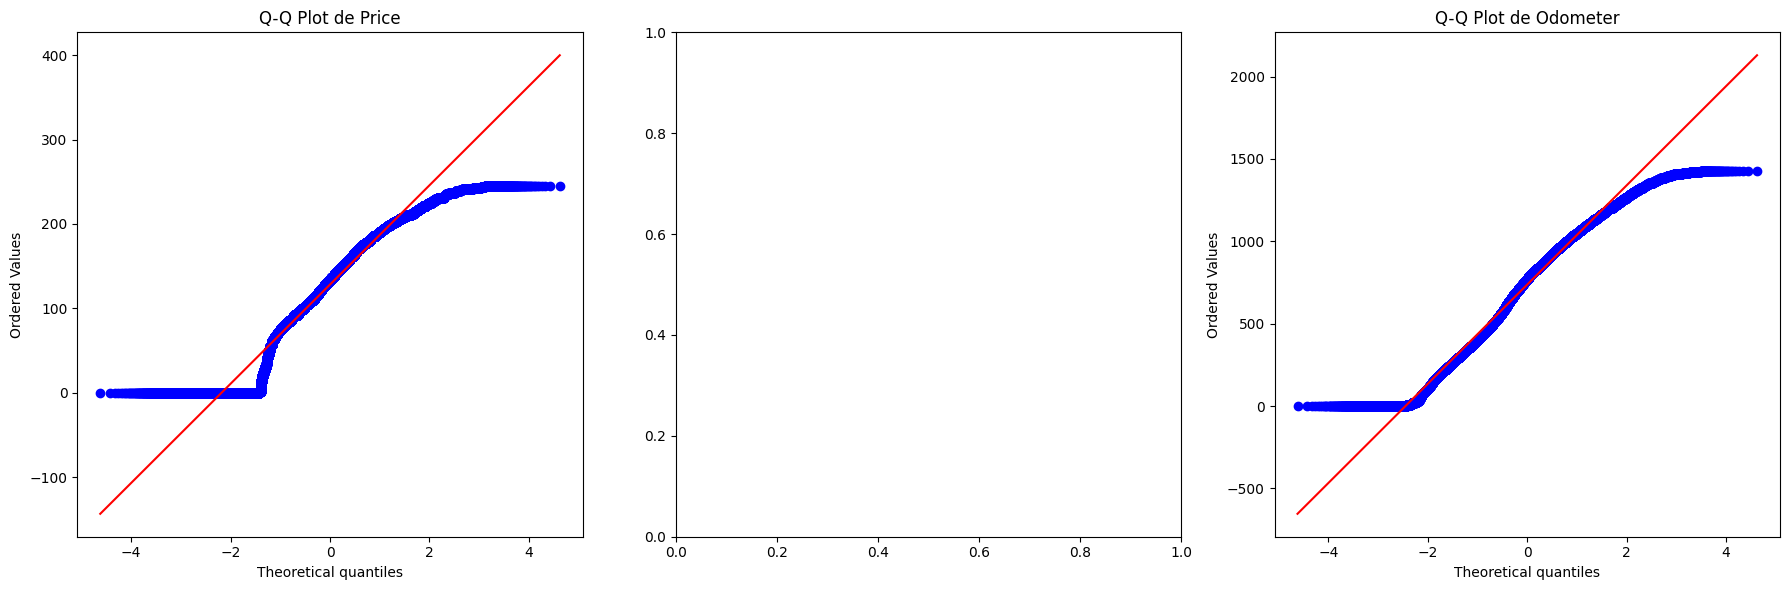

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico Q-Q para 'price'
stats.probplot(transf_df['price_yeo'], dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot de Price')

# Gráfico Q-Q para 'odometer'
stats.probplot(transf_df['odometer_yeo'], dist="norm", plot=axs[2])
axs[2].set_title('Q-Q Plot de Odometer')

plt.tight_layout()
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [109]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
minmax_scaler = MinMaxScaler()

# Aplicar el escalamiento Min-Max a las variables transformadas
minmax_df = pd.DataFrame(minmax_scaler.fit_transform(transf_df),
                         columns=['price_minmax', 'odometer_minmax'])

# Mostrar el dataframe con las variables escaladas
print(minmax_df)

        price_minmax  odometer_minmax
0           0.794060         0.437060
1           0.669384         0.487739
2           0.852192         0.242839
3           0.767013         0.364403
4           0.560956         0.665534
...              ...              ...
366323      0.681997         0.320145
366324      0.762738         0.189543
366325      0.808127         0.107714
366326      0.745306         0.308810
366327      0.762738         0.265849

[366328 rows x 2 columns]


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

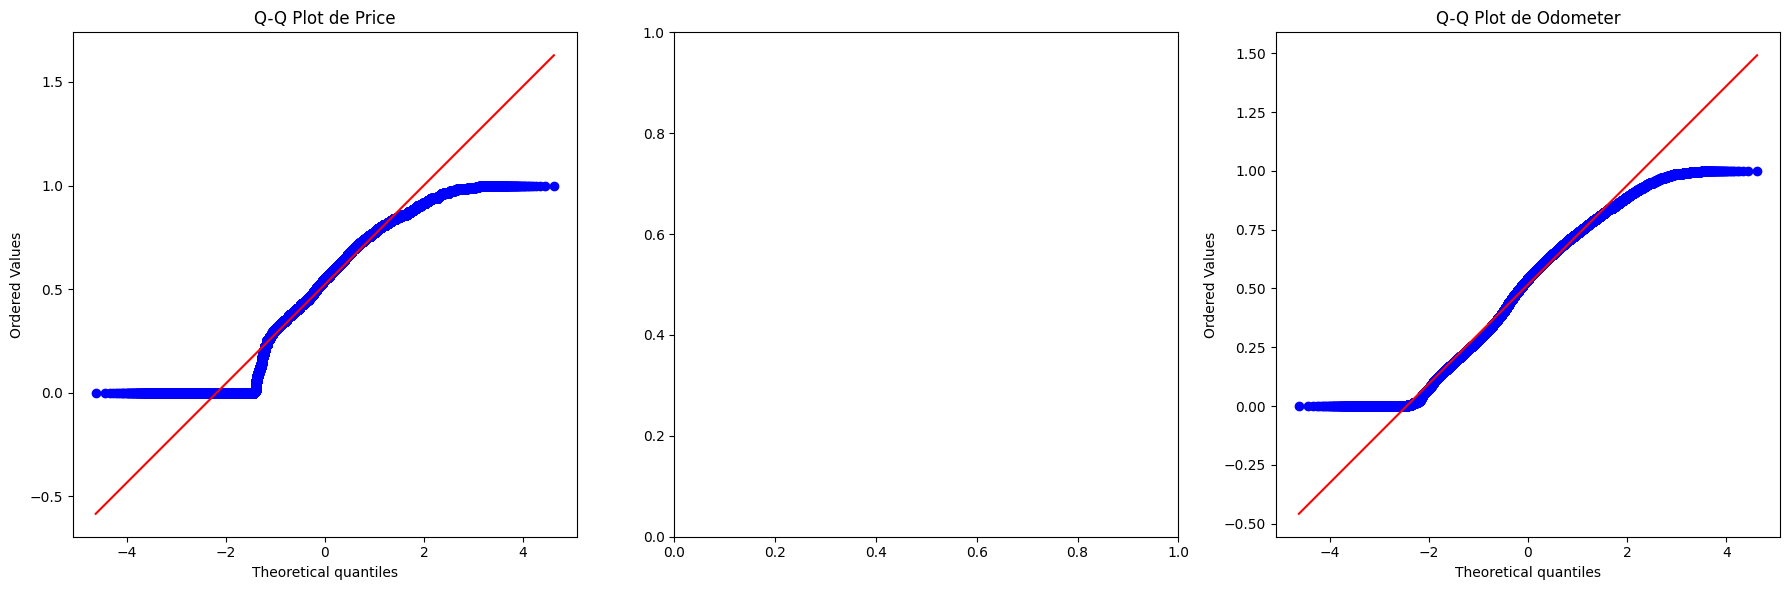

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico Q-Q para 'price'
stats.probplot(minmax_df['price_minmax'], dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot de Price')

# Gráfico Q-Q para 'odometer'
stats.probplot(minmax_df['odometer_minmax'], dist="norm", plot=axs[2])
axs[2].set_title('Q-Q Plot de Odometer')

plt.tight_layout()
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [112]:
cars_df.describe(include='object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,366328,366328,366328,366328,366328,366328,366328,366328,366328
unique,404,413,40,19097,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3188,2737,61660,7436,312085,354717,291628,154259,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [113]:
highly_cardinal_variables = []
few_cardinal_variables = []

for column in cars_df.select_dtypes(include='object'):
  if cars_df[column].nunique() > 100:
    highly_cardinal_variables.append(column)
  else:
    few_cardinal_variables.append(column)

print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

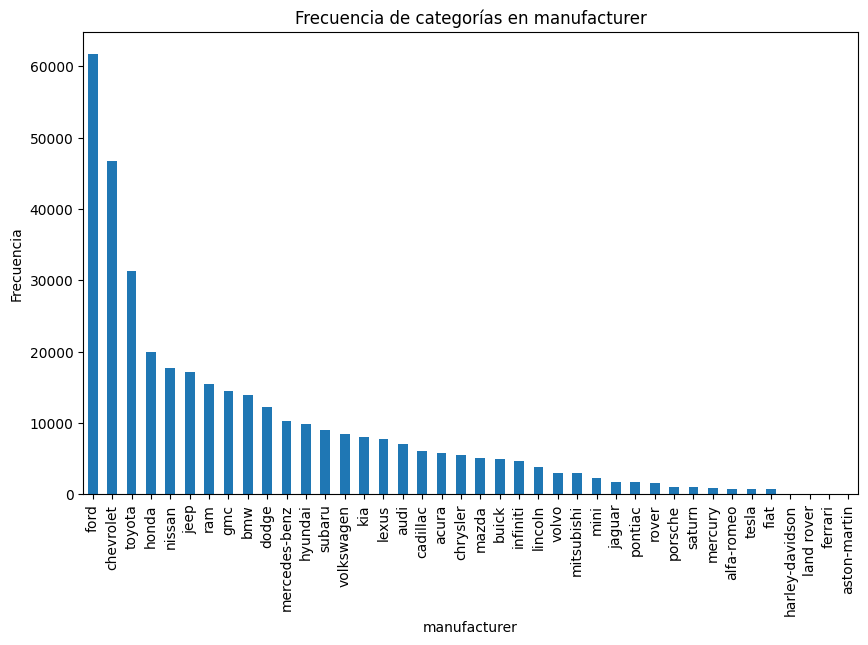

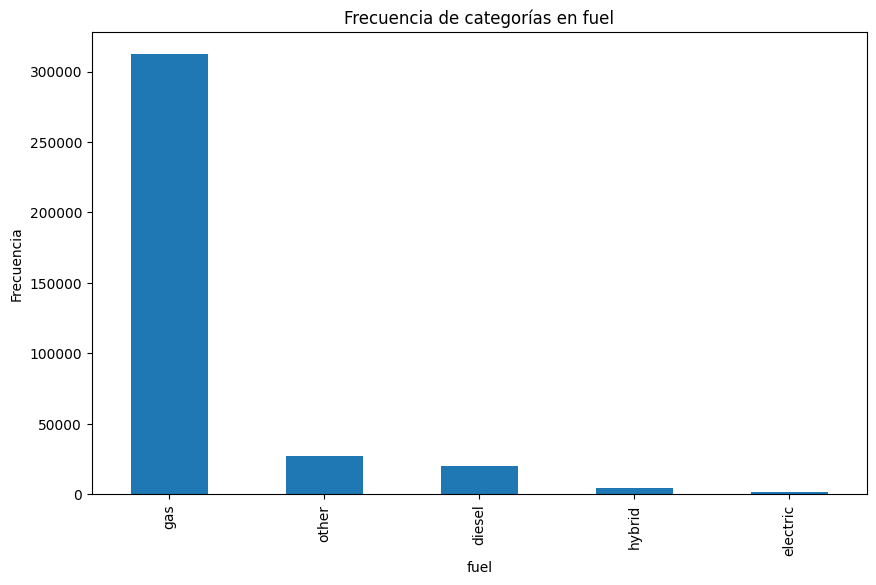

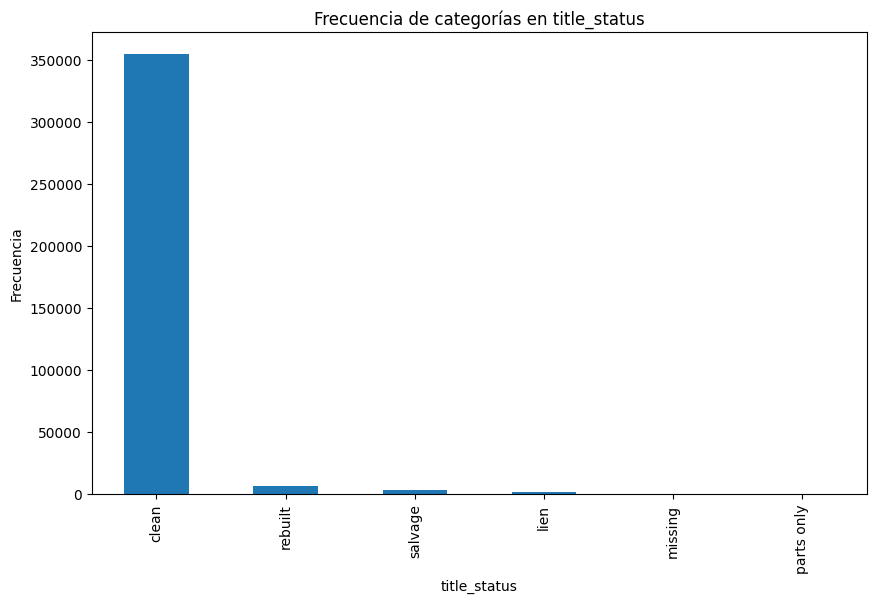

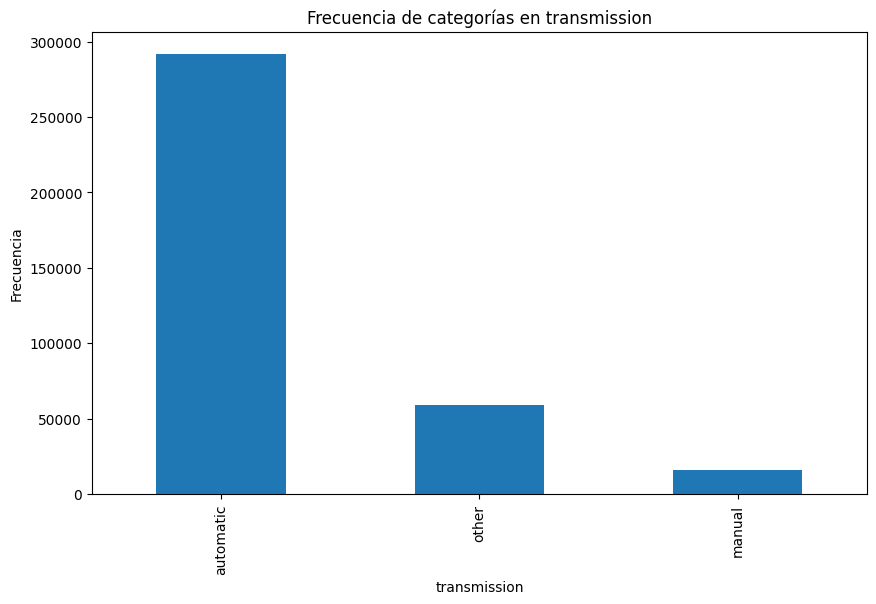

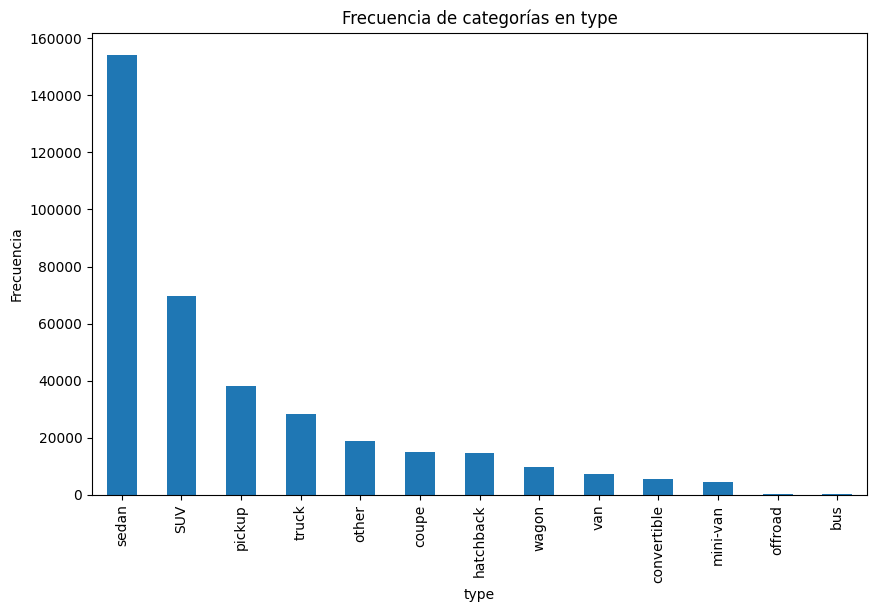

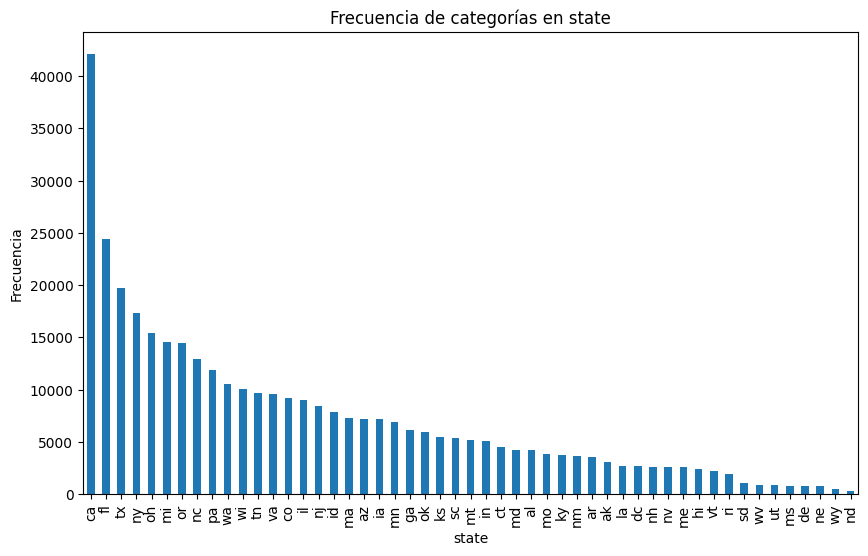

In [119]:
for column in few_cardinal_variables:
  cars_df[column].value_counts().plot(kind='bar', figsize=(10,6))
  plt.title(f'Frecuencia de categorías en {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [136]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
onehot_df = encoder.fit_transform(cars_df[few_cardinal_variables])

In [138]:
print('Input', onehot_df.shape)
print(onehot_df[:5, :])

Input (366328, 112)
  (0, 12)	1.0
  (0, 40)	1.0
  (0, 49)	1.0
  (0, 57)	1.0
  (0, 62)	1.0
  (1, 6)	1.0
  (1, 40)	1.0
  (1, 49)	1.0
  (1, 57)	1.0
  (1, 62)	1.0
  (2, 6)	1.0
  (2, 40)	1.0
  (2, 49)	1.0
  (2, 57)	1.0
  (2, 62)	1.0
  (3, 36)	1.0
  (3, 40)	1.0
  (3, 49)	1.0
  (3, 57)	1.0
  (3, 62)	1.0
  (4, 11)	1.0
  (4, 40)	1.0
  (4, 59)	1.0
  (4, 62)	1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [129]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

In [134]:
encoder = BinaryEncoder()

binary_df = encoder.fit_transform(cars_df[highly_cardinal_variables])
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,0
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [139]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df = pd.DataFrame(onehot_df.toarray())
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

# Concatenar los dataframes
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)
print(final_df.shape)


(366328, 147)


In [140]:
final_df

,price_minmax,odometer_minmax,0,1,2,3,4,5,6,7,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794060,0.437060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669384,0.487739,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852192,0.242839,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767013,0.364403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.560956,0.665534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.681997,0.320145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,0
366324,0.762738,0.189543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
366325,0.808127,0.107714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,1
366326,0.745306,0.308810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,1
